# Regression

###### COMP4670/8600 - Statistical Machine Learning - Tutorial

In this lab, we will use linear regression to predict the value of a home and explore the impact of regularisation.

### Assumed knowledge
- Maximum likelihood solution to a linear regression problem, with and without regularisation (lectures)
- Matrix calculations in numpy (lab and precourse material)
- Theory behind regularisation (lectures)

### After this lab, you should be comfortable with:
- Practical linear regression problems
- Picking an appropriate regularisation parameter for a given problem

$\newcommand{\trace}[1]{\operatorname{tr}\left\{#1\right\}}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\inner}[2]{\langle #1, #2 \rangle}$
$\newcommand{\DD}{\mathscr{D}}$
$\newcommand{\grad}[1]{\operatorname{grad}#1}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

Setting up the environment

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## The data set


We will use [a dataset](https://machlearn.gitlab.io/sml2020/tutorials/02-dataset.csv) on the price of housing in Boston (see [description](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)). 
We aim to predict the value of a home from other factors.
In this dataset, each row is one house. The first entry is the value of the house and we will predict it from the remaining values which have been normalised to be in the range $[-1, 1]$. The column labels are

```'medv', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'```

In the below cell we load the dataset. To read in the data, we use ```np.loadtxt``` with the optional argument ```delimiter=','```, as our data is comma separated rather than space separated. Then we remove the column containing the binary variable ```'chas'```.

In [2]:
# Load data with column labels
names = ['medv', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
loaded_data = np.loadtxt('02-dataset.csv', delimiter=',')

# remove chas
column_idxes = list(range(len(names)))
chas_idx = names.index('chas')
wanted_columns = list(column_idxes)
wanted_columns.remove(chas_idx)
data = loaded_data[:,wanted_columns]
data_names = list(names)
data_names.remove('chas')

The data has 506 rows (examples) and 13 columns (1 label and 12 features).

In [3]:
print(data_names)
print(np.array_str(data[:5], precision=3))
assert data.shape == (506,13), data.shape

['medv', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
[[24.    -1.    -0.64  -0.864 -0.37   0.155  0.283 -0.462 -1.    -0.584
  -0.426  1.    -0.821]
 [21.    -1.    -1.    -0.515 -0.654  0.096  0.565 -0.302 -0.913 -0.79
   0.106  1.    -0.591]
 [34.    -1.    -1.    -0.515 -0.654  0.389  0.199 -0.302 -0.913 -0.79
   0.106  0.979 -0.873]
 [33.    -0.999 -1.    -0.874 -0.7    0.317 -0.116 -0.103 -0.826 -0.866
   0.298  0.989 -0.933]
 [36.    -0.999 -1.    -0.874 -0.7    0.374  0.057 -0.103 -0.826 -0.866
   0.298  1.    -0.801]]


## Regression without regularisation

Implement a **function** to find the maximum likelihood solution $w_{ML}$ assuming Gaussian noise for this linear regression problem. Remember from the lectures that this is equivalent to a linear regresion problem with the cost function set as the sum of squares error. See (3.15) in Bishop.

In [24]:
def w_ml_unregularised(Phi, t):
    # Phi: Features (N,D), t: Targets (N,)
    # returns w_ml_unregularised (D,)
    ### TODO
    return np.linalg.inv(Phi.T @ Phi) @ Phi.T @ t
    raise NotImplementedError

## Training and testing

Use a fifth of the available data for training the model using maximum likelihood. The rest of the data is allocated to the test set. Report the root mean squared error (RMSE) for the training set and the test set.
In this cases, use the identity map as the basis function, $\phi(x)=x$.

Note that the data may be sorted or ordered in some way we cannot predict. How will you account for this?

In [73]:
def split_data(data):
    """Randomly split data into two groups. The first group is a fifth of the data."""
    
    ### TODO: implement a strategy to extract indices for training and testing instances.
    indices = np.random.permutation(data.shape[0])
    train_idx, test_idx = indices[:int((data.shape[0]/5))], indices[int((data.shape[0]/5)):]
    
    # Assume label is in the first column
    X_train = data[train_idx, 1:]
    t_train = data[train_idx, 0]
    X_test = data[test_idx, 1:]
    t_test = data[test_idx, 0]
    
    return X_train, t_train, X_test, t_test

def rmse(X_train, t_train, X_test, t_test, w):
    """Return the RMSE for training and test sets"""
    
    def rmse_template(X, t, w):
        # Data: X (N,D)
        # Targets: t (N,)
        # Params: w (D,)
        
        ### TODO
        
        vec = ((t - (X @ w)).T @ (t - (X @ w)))
        
        return 1/2*vec
        
        raise NotImplementedError
    
    # Training error
    rmse_train = rmse_template(X_train, t_train, w)
    # Testing error
    rmse_test = rmse_template(X_test, t_test, w)
    
    return rmse_train, rmse_test

X_train, t_train, X_test, t_test = split_data(data)
w_unreg = w_ml_unregularised(X_train, t_train)

train_rmse, test_rmse = rmse(X_train, t_train, X_test, t_test, w_unreg)
print("RMSE without regularisation: Train {:.6f}, Test {:.6f}".format(train_rmse, test_rmse))

RMSE without regularisation: Train 1219.290229, Test 6235.607845


## Interpreting the model

Find the feature with the biggest magnitude of weight. The below codes provide a plot with respect of this feature, discuss what do you observe.

11


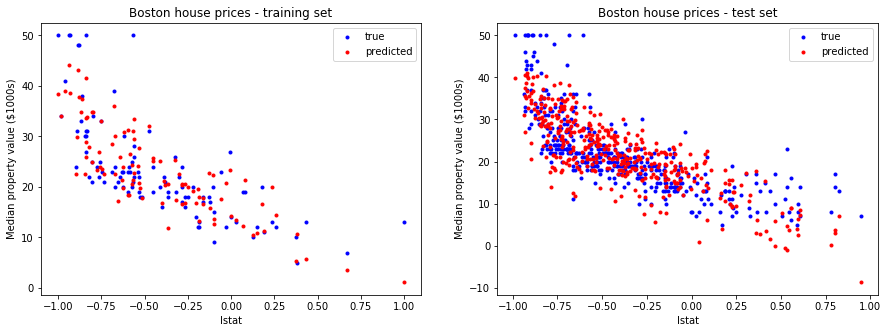

In [74]:
# Solution
feature_names = data_names[1:]
print(np.argmax(np.abs(w_unreg)))
max_feature = np.argmax(np.abs(w_unreg)) # TODO
t_train_pred = np.dot(X_train, w_unreg)
t_test_pred = np.dot(X_test, w_unreg)

# Plotting Code
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
ax.plot(X_train[:,max_feature], t_train, 'b.', label='true')
ax.plot(X_train[:,max_feature], t_train_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - training set')
ax.set_xlabel(feature_names[max_feature])
ax.set_ylabel('Median property value ($1000s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(X_test[:,max_feature], t_test, 'b.', label='true')
ax.plot(X_test[:,max_feature], t_test_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - test set')
ax.set_xlabel(feature_names[max_feature])
ax.set_ylabel('Median property value ($1000s)')
ax.legend()
plt.show()

## Regression with regularisation

Implement a **function** to find the maximum likelihood solution $w_{reg}$ for some regularisation parameter $\lambda > 0$ assuming Gaussian noise for this linear regression problem. See (3.28) in Bishop.

In [75]:
def w_ml_regularised(Phi, t, l):
    # Phi: Features (N,D), t: Targets (N,), l: Lambda (,)
    # returns w_ml_unregularised (D,)    
    ### TODO
    return np.linalg.inv(l * np.identity(Phi.shape[1]) + Phi.T @ Phi) @ Phi.T @ t
    raise NotImplementedError

By calculating the RMSE on the training and test sets, evaluate the impact of regularisation for $\lambda = 1.1$.

What is the effect of regularisation? (Hint: use `np.linalg.norm` to compare the magnitude of both versions of the learned weight)

In [76]:
l = 1.1
X_train, t_train, X_test, t_test = split_data(data)
w_reg = w_ml_regularised(X_train, t_train,l)

train_rmse, test_rmse = rmse(X_train, t_train, X_test, t_test, w_reg)
print("RMSE with regularisation: Train {:.6f}, Test {:.6f}".format(train_rmse, test_rmse))

RMSE with regularisation: Train 1530.107723, Test 5725.957851


In [77]:
# Solution
### TODO: calculate the norm of w_unreg and w_reg
print(np.linalg.norm(w_unreg), np.linalg.norm(w_reg))

27.132562617820568 25.149257889930084


## Picking a regularisation parameter

The below code plots the RMSE on both training and test sets against the regularisation parameter $\log(\lambda)$ for a range of values of $\log(\lambda)$. Read the plot and answer the questions, also discuss with a partner on your observation:

1) When is the model under-regularising and over-regularising? How do you interpret the saturation when $\log(\lambda)$ is extremely large? 

2) By looking at the second plot, can you identify what is the optimal value of $\log(\lambda)$?

3) Which value (train and test) is the evidence for your choice in 2) and why should you choose it over the other?

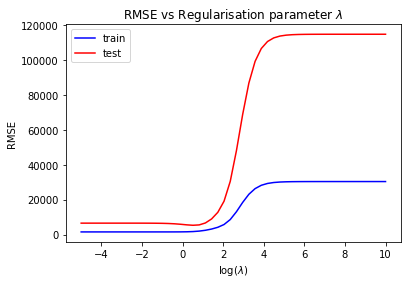

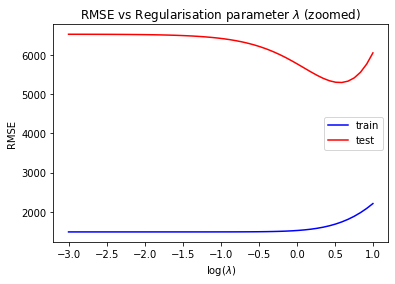

In [78]:
log_lambdas = np.linspace(-5, 10)
# Each row is a value of lambda
# Columns are respectively ['rmse_train_linear', 'rmse_test_linear']
results = np.zeros((len(log_lambdas), 2))

for ix, l in enumerate(log_lambdas):
    rmse_train, rmse_test = rmse(X_train, t_train, X_test, t_test, 
                                 w_ml_regularised(X_train, t_train, pow(10,float(l))))
    results[ix, 0] = rmse_train
    results[ix, 1] = rmse_test

#fig = plt.figure(figsize=(15,8))
plt.title('RMSE vs Regularisation parameter $\lambda$')
plt.plot(log_lambdas, results[:,0], 'b-', label='train') # training data
plt.plot(log_lambdas, results[:,1], 'r-', label='test') # test data
plt.xlabel('log($\lambda$)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Look closer at range(-3, 1)

log_lambdas = np.linspace(-3, 1)
# Each row is a value of lambda
# Columns are respectively ['rmse_train_linear', 'rmse_test_linear']
results = np.zeros((len(log_lambdas), 2))

for ix, l in enumerate(log_lambdas):
    rmse_train, rmse_test = rmse(X_train, t_train, X_test, t_test, 
                                 w_ml_regularised(X_train, t_train, pow(10,float(l))))
    results[ix, 0] = rmse_train
    results[ix, 1] = rmse_test

plt.title('RMSE vs Regularisation parameter $\lambda$ (zoomed)')
plt.plot(log_lambdas, results[:,0], 'b-', label='train') # training data
plt.plot(log_lambdas, results[:,1], 'r-', label='test') # test data
plt.xlabel('log($\lambda$)')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Basis Functions
We want to use basis functions to improve our performance. Implement subroutines for polynomial basis function of degree 2. See [the feature map based on the binomial formula](http://en.wikipedia.org/wiki/Polynomial_kernel) .

In [95]:
def phi_quadratic(x):    
    """Compute phi(x) for a single training example using quadratic basis function."""
    # x: Single feature vector (D,)
    # Returns quadratic feature vector ((D+1)*(D+2)/2,)
    
    ### TODO
    
    return ((x+1)*(x+2))/2
    
    raise NotImplementedError

Apply this to your train and test sets, and repeat the above exercise with these new features. Report what differences you see.

### Without Regularisation ###


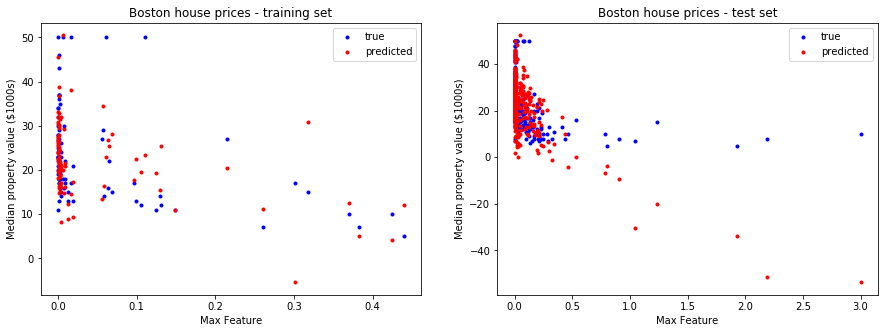

RMSE with basis functions and without regularisation: Train 2221.320703, Test 13030.549013

### With Regularisation ###


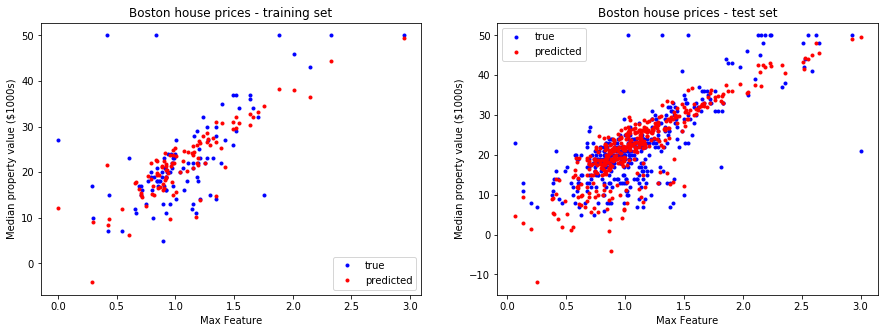

RMSE with basis functions and with regularisation: Train 2311.517191, Test 6329.154999



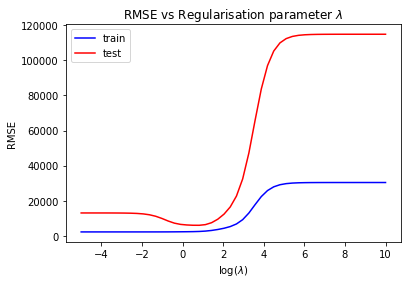

In [96]:
# Without Regularisation
print("### Without Regularisation ###")

Phi_train = np.array([phi_quadratic(X_train[i]) for i in range(X_train.shape[0])])
Phi_test = np.array([phi_quadratic(X_test[i]) for i in range(X_test.shape[0])])

w_unreg = w_ml_unregularised(Phi_train, t_train)
max_feature = np.argmax(np.abs(w_unreg))
t_train_pred = np.dot(Phi_train, w_unreg)
t_test_pred = np.dot(Phi_test, w_unreg)
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
ax.plot(Phi_train[:,max_feature], t_train, 'b.', label='true')
ax.plot(Phi_train[:,max_feature], t_train_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - training set')
ax.set_xlabel("Max Feature")
ax.set_ylabel('Median property value ($1000s)')
x_vals = np.linspace(-1,1)
ax.legend()

ax = fig.add_subplot(122)
ax.plot(Phi_test[:,max_feature], t_test, 'b.', label='true')
ax.plot(Phi_test[:,max_feature], t_test_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - test set')
ax.set_xlabel("Max Feature")
ax.set_ylabel('Median property value ($1000s)')
ax.legend()
plt.show()

train_rmse, test_rmse = rmse(Phi_train, t_train, Phi_test, t_test, w_unreg)
print("RMSE with basis functions and without regularisation: Train {:.6f}, Test {:.6f}".format(train_rmse, test_rmse))
print()

# With Regularisation
print("### With Regularisation ###")

w_reg = w_ml_regularised(Phi_train, t_train, 1.1)
max_feature = np.argmax(np.abs(w_reg))
t_train_pred = np.dot(Phi_train, w_reg)
t_test_pred = np.dot(Phi_test, w_reg)
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
ax.plot(Phi_train[:,max_feature], t_train, 'b.', label='true')
ax.plot(Phi_train[:,max_feature], t_train_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - training set')
ax.set_xlabel("Max Feature")
ax.set_ylabel('Median property value ($1000s)')
ax.legend()

ax = fig.add_subplot(122)
ax.plot(Phi_test[:,max_feature], t_test, 'b.', label='true')
ax.plot(Phi_test[:,max_feature], t_test_pred, 'r.', label='predicted')
ax.set_title('Boston house prices - test set')
ax.set_xlabel("Max Feature")
ax.set_ylabel('Median property value ($1000s)')
ax.legend()
plt.show()

train_rmse, test_rmse = rmse(Phi_train, t_train, Phi_test, t_test, w_reg)
print("RMSE with basis functions and with regularisation: Train {:.6f}, Test {:.6f}".format(train_rmse, test_rmse))
print()

# RMSE vs Regularisation curve

log_lambdas = np.linspace(-5, 10)
# Each row is a value of lambda
# Columns are respectively ['rmse_train_linear', 'rmse_test_linear']
results = np.zeros((len(log_lambdas), 2))

for ix, l in enumerate(log_lambdas):
    rmse_train, rmse_test = rmse(Phi_train, t_train, Phi_test, t_test, 
                                 w_ml_regularised(Phi_train, t_train, pow(10,float(l))))
    results[ix, 0] = rmse_train
    results[ix, 1] = rmse_test

plt.title('RMSE vs Regularisation parameter $\lambda$')
plt.plot(log_lambdas, results[:,0], 'b-', label='train') # training data
plt.plot(log_lambdas, results[:,1], 'r-', label='test') # test data
plt.xlabel('log($\lambda$)')
plt.ylabel('RMSE')
plt.legend()
plt.show()